## Classical Search
The problem we will be working with is an agent finding a path from one position to a
different position in a grid. Each position in the grid is represented by a numeric value
indicating the cost to move to that position from any neighbor. For example,

1 5 2 4 1 5 0 0 4 0<br>
1 5 0 2 4 1 0 2 5 0<br>
1 0 5 5 1 2 1 4 4 3<br>
2 1 2 2 0 0 2 4 4 0<br>
2 0 4 2 0 0 1 5 1 2<br>
0 3 4 1 3 0 4 2 1 3<br>
1 0 3 5 2 5 1 0 4 3<br>
2 4 0 1 0 2 4 2 4 0<br>
0 4 5 5 2 5 3 1 4 3<br>
3 0 3 3 5 5 3 4 1 1

A value of 0 indicates that the location cannot be traversed. The agent can move in the four
cardinal directions one position at a time. The agent cannot move diagonally.

In [2]:
from helpers import *
from uninformed import *
from informed import *
from local import *

## Perform Breadth First Search

In [3]:
#read grid
grid = readGrid("grid.txt")
#Set the starting positon and goal position 
start_pos = [0, 0]
goal_pos = [len(grid)-1, len(grid[0])-1]
#Set up the  initial closed and open lists 
open_list = []
closed_list = []
#setup uninformed breadth search search
start_node = Node(value=start_pos)
goal_node = Node(value=goal_pos)

if (start_node.value != goal_node.value):
    closed_list.append(start_node)
    breadth_path = uninformed_search(open_list, closed_list, start_node, goal_node, grid, True)
#visualizeGrid(grid, breadth_path, True)
outputGrid(grid, start_pos, goal_pos, breadth_path, 'breadth_output.txt')



success
Total expanded nodes: 28
Path cost: 70


## Perform Depth First Search

In [4]:
#read grid
grid = readGrid("grid.txt")
#Set the starting positon and goal position 
start_pos = [0, 0]
goal_pos = [len(grid)-1, len(grid[0])-1]
#Set up the  initial closed and open lists 
open_list = []
closed_list = []
#setup uninformed depth search
start_node = Node(value=start_pos)
goal_node = Node(value=goal_pos)

if (start_node.value != goal_node.value):
    closed_list.append(start_node)
    depth_path = uninformed_search(open_list, closed_list, start_node, goal_node, grid, False)
#visualizeGrid(grid, depth_path, True)
outputGrid(grid, start_pos, goal_pos, depth_path, 'depth_output.txt')


success
Total expanded nodes: 76
Path cost: 52


## Perform A* Search

In [5]:
#read grid
grid = readGrid("grid.txt")
#Set the starting positon and goal position 
start_pos = [0, 0]
goal_pos = [len(grid)-1, len(grid[0])-1]
#Set up the  initial closed and open lists 
open_list = []
closed_list = []
#setup informed search
heur = heuristic(start_pos, goal_pos)
start_node = InformedNode(start_pos, g=grid[start_pos[0]][start_pos[1]], h=heur)
goal_node = InformedNode(value=goal_pos)

if (start_node.value != goal_node.value):
    closed_list.append(start_node)
    path = a_star(open_list, closed_list, start_node, goal_node, grid)
outputGrid(grid, start_pos, goal_pos, path, 'a_star_output.txt')
#visualizeGrid(grid, path, True)


success
Total expanded nodes: 20
Path cost: 37


## Perform Simulated Annealing (Local Search)

In [6]:
board_sizes = [4, 8, 16]
decay_rates = [.9, .75, .5]
thresholds = [0.000001, 0.0000001, 0.00000001]

#trying different pairs 
for i in range(0, 3):
    print("***************************")
    print(f"Board size: {board_sizes[1]}")
    print("***************************")
    print(f"Decay rate: {decay_rates[i]}")
    print("***************************")
    print(f"Threshold: {thresholds[i]}")
    print("***************************")
    board = Board(board_sizes[1])
    board.rand()
    result = simulated_annealing(board, decay_rates[i], thresholds[i]) 

***************************
Board size: 8
***************************
Decay rate: 0.9
***************************
Threshold: 1e-06
***************************
Initial board:
[1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
h-value: 10

Final board:
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
h-value: 2
***************************
Board size: 8
***************************
Decay rate: 0.75
***************************
Threshold: 1e-07
***************************
Initial board:
[1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
h-value: 14

F

In [7]:
#10 runs of each board size
total = 0
for j in board_sizes:
    print("***************************")
    print(f"Board size: {j}")
    print("***************************")
    print(f"Decay rate: {decay_rates[0]}")
    print("***************************")
    print(f"Threshold: {thresholds[0]}")
    for k in range(0, 10):
        board = Board(j)
        board.rand()  
        print("---------------------------")
        print(f"Run: {k+1}")
        print()
        result = simulated_annealing(board, decay_rates[0], thresholds[0])
        total = total + result
    print("---------------------------") 
    print(f"Average h-value of board size {j}: {total/10}")
    print("---------------------------")

***************************
Board size: 4
***************************
Decay rate: 0.9
***************************
Threshold: 1e-06
---------------------------
Run: 1

Initial board:
[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 0, 1]
[0, 0, 1, 0]
h-value: 4

Final board:
[0, 1, 0, 0]
[0, 0, 0, 1]
[1, 0, 0, 0]
[0, 0, 1, 0]
h-value: 0
---------------------------
Run: 2

Initial board:
[0, 1, 0, 0]
[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 0, 1]
h-value: 6

Final board:
[0, 1, 0, 0]
[0, 0, 0, 1]
[1, 0, 0, 0]
[0, 0, 1, 0]
h-value: 0
---------------------------
Run: 3

Initial board:
[0, 0, 1, 0]
[0, 1, 0, 0]
[0, 1, 0, 0]
[0, 1, 0, 0]
h-value: 8

Final board:
[0, 0, 1, 0]
[1, 0, 0, 0]
[0, 0, 0, 1]
[0, 1, 0, 0]
h-value: 0
---------------------------
Run: 4

Initial board:
[0, 1, 0, 0]
[0, 1, 0, 0]
[0, 0, 1, 0]
[0, 0, 1, 0]
h-value: 6

Final board:
[0, 1, 0, 0]
[0, 0, 0, 1]
[1, 0, 0, 0]
[0, 0, 1, 0]
h-value: 0
---------------------------
Run: 5

Initial board:
[0, 0, 1, 0]
[0, 0, 1, 0]
[0, 1, 0, 0]
[1, 0, 0, 0]
h-

## Run tests

In [8]:
from tests import *

success
Total expanded nodes: 64
Path cost: 58
success
Total expanded nodes: 77
Path cost: 28
success
Total expanded nodes: 52
Path cost: 128
success
Total expanded nodes: 59
Path cost: 134
success
Total expanded nodes: 49
Path cost: 131
success
Total expanded nodes: 80
Path cost: 9
success
Total expanded nodes: 51
Path cost: 101
success
Total expanded nodes: 69
Path cost: 26
success
Total expanded nodes: 18
Path cost: 72
success
Total expanded nodes: 28
Path cost: 137
success
Total expanded nodes: 68
Path cost: 108
success
Total expanded nodes: 23
Path cost: 90
success
Total expanded nodes: 75
Path cost: 39
success
Total expanded nodes: 46
Path cost: 89
success
Total expanded nodes: 34
Path cost: 143
success
Total expanded nodes: 16
Path cost: 85
success
Total expanded nodes: 29
Path cost: 115
success
Total expanded nodes: 21
Path cost: 104
success
Total expanded nodes: 49
Path cost: 143
success
Total expanded nodes: 51
Path cost: 92
success
Total expanded nodes: 12
Path cost: 77
succ

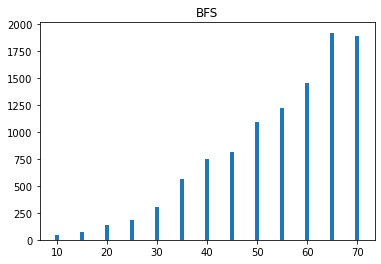

In [9]:
#Breadth First
runTests(False, 'BFS')

In [11]:
#Depth First
runTests(False, 'DFS')

SyntaxError: unmatched ')' (3980810185.py, line 2)

In [ ]:
#A*
runTests(False, 'A_star')